In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds.csv


**Importing libraries**:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading data**

In [12]:
data = pd.read_csv(r"/kaggle/input/diamonds.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
data.rename(columns={'x': 'length_mm',
                                  'y': 'width_mm',
                                  'z': 'depth_mm'},
                         inplace = True)
data

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Analytics**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length_mm  53940 non-null  float64
 8   width_mm   53940 non-null  float64
 9   depth_mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [15]:
data.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
all_columns = data.columns
discrete_columns = ['cut', 'color', 'clarity']
continuous_columns = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'depth_mm', 'price']
all_columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length_mm', 'width_mm', 'depth_mm'],
      dtype='object')

In [17]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


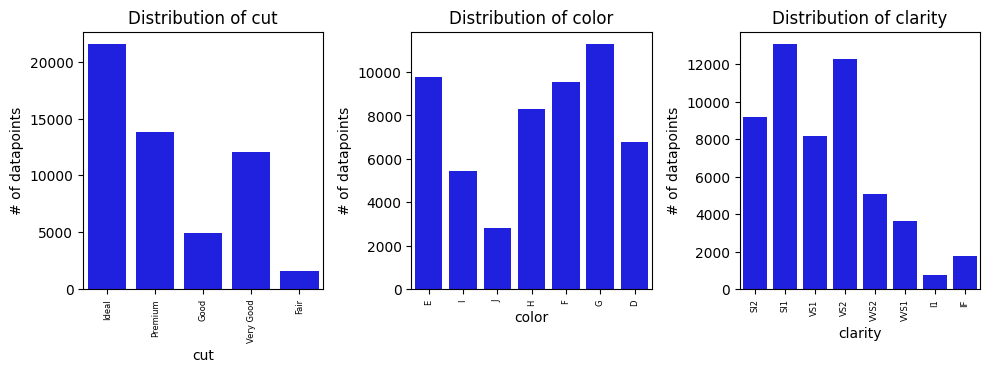

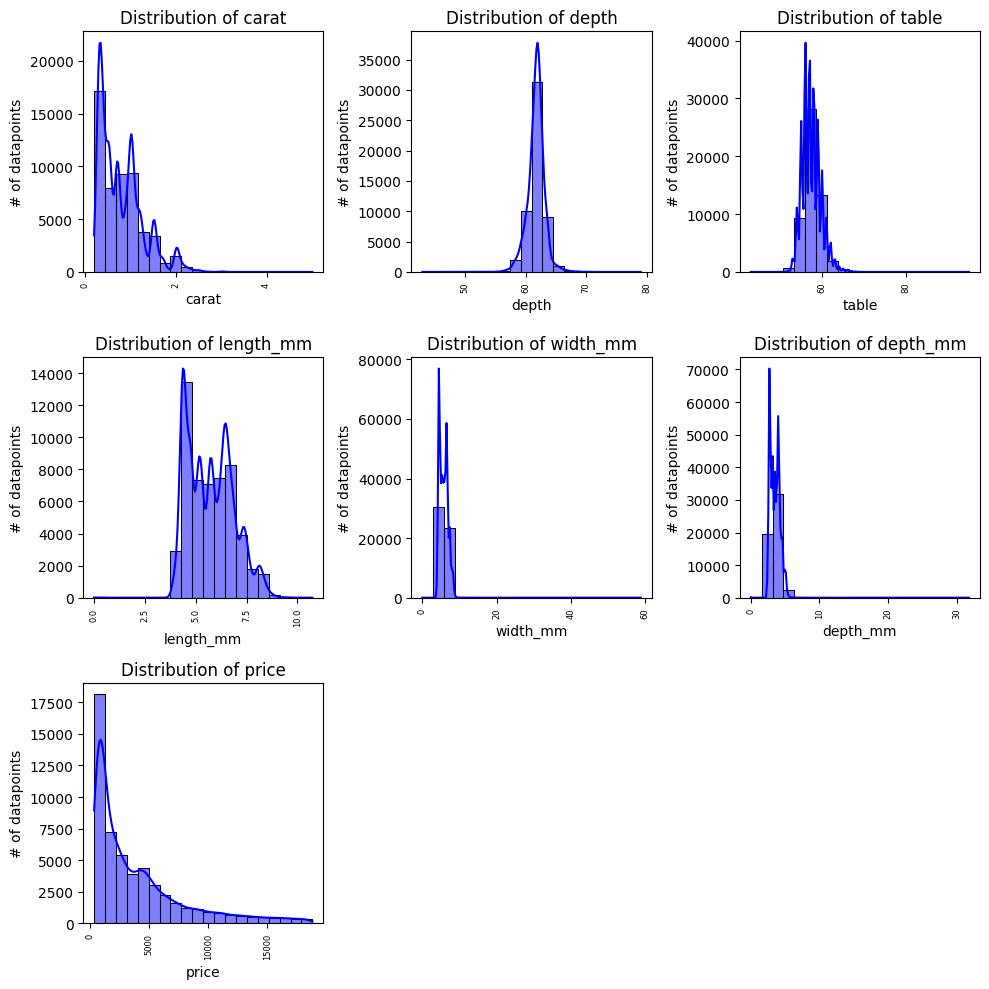

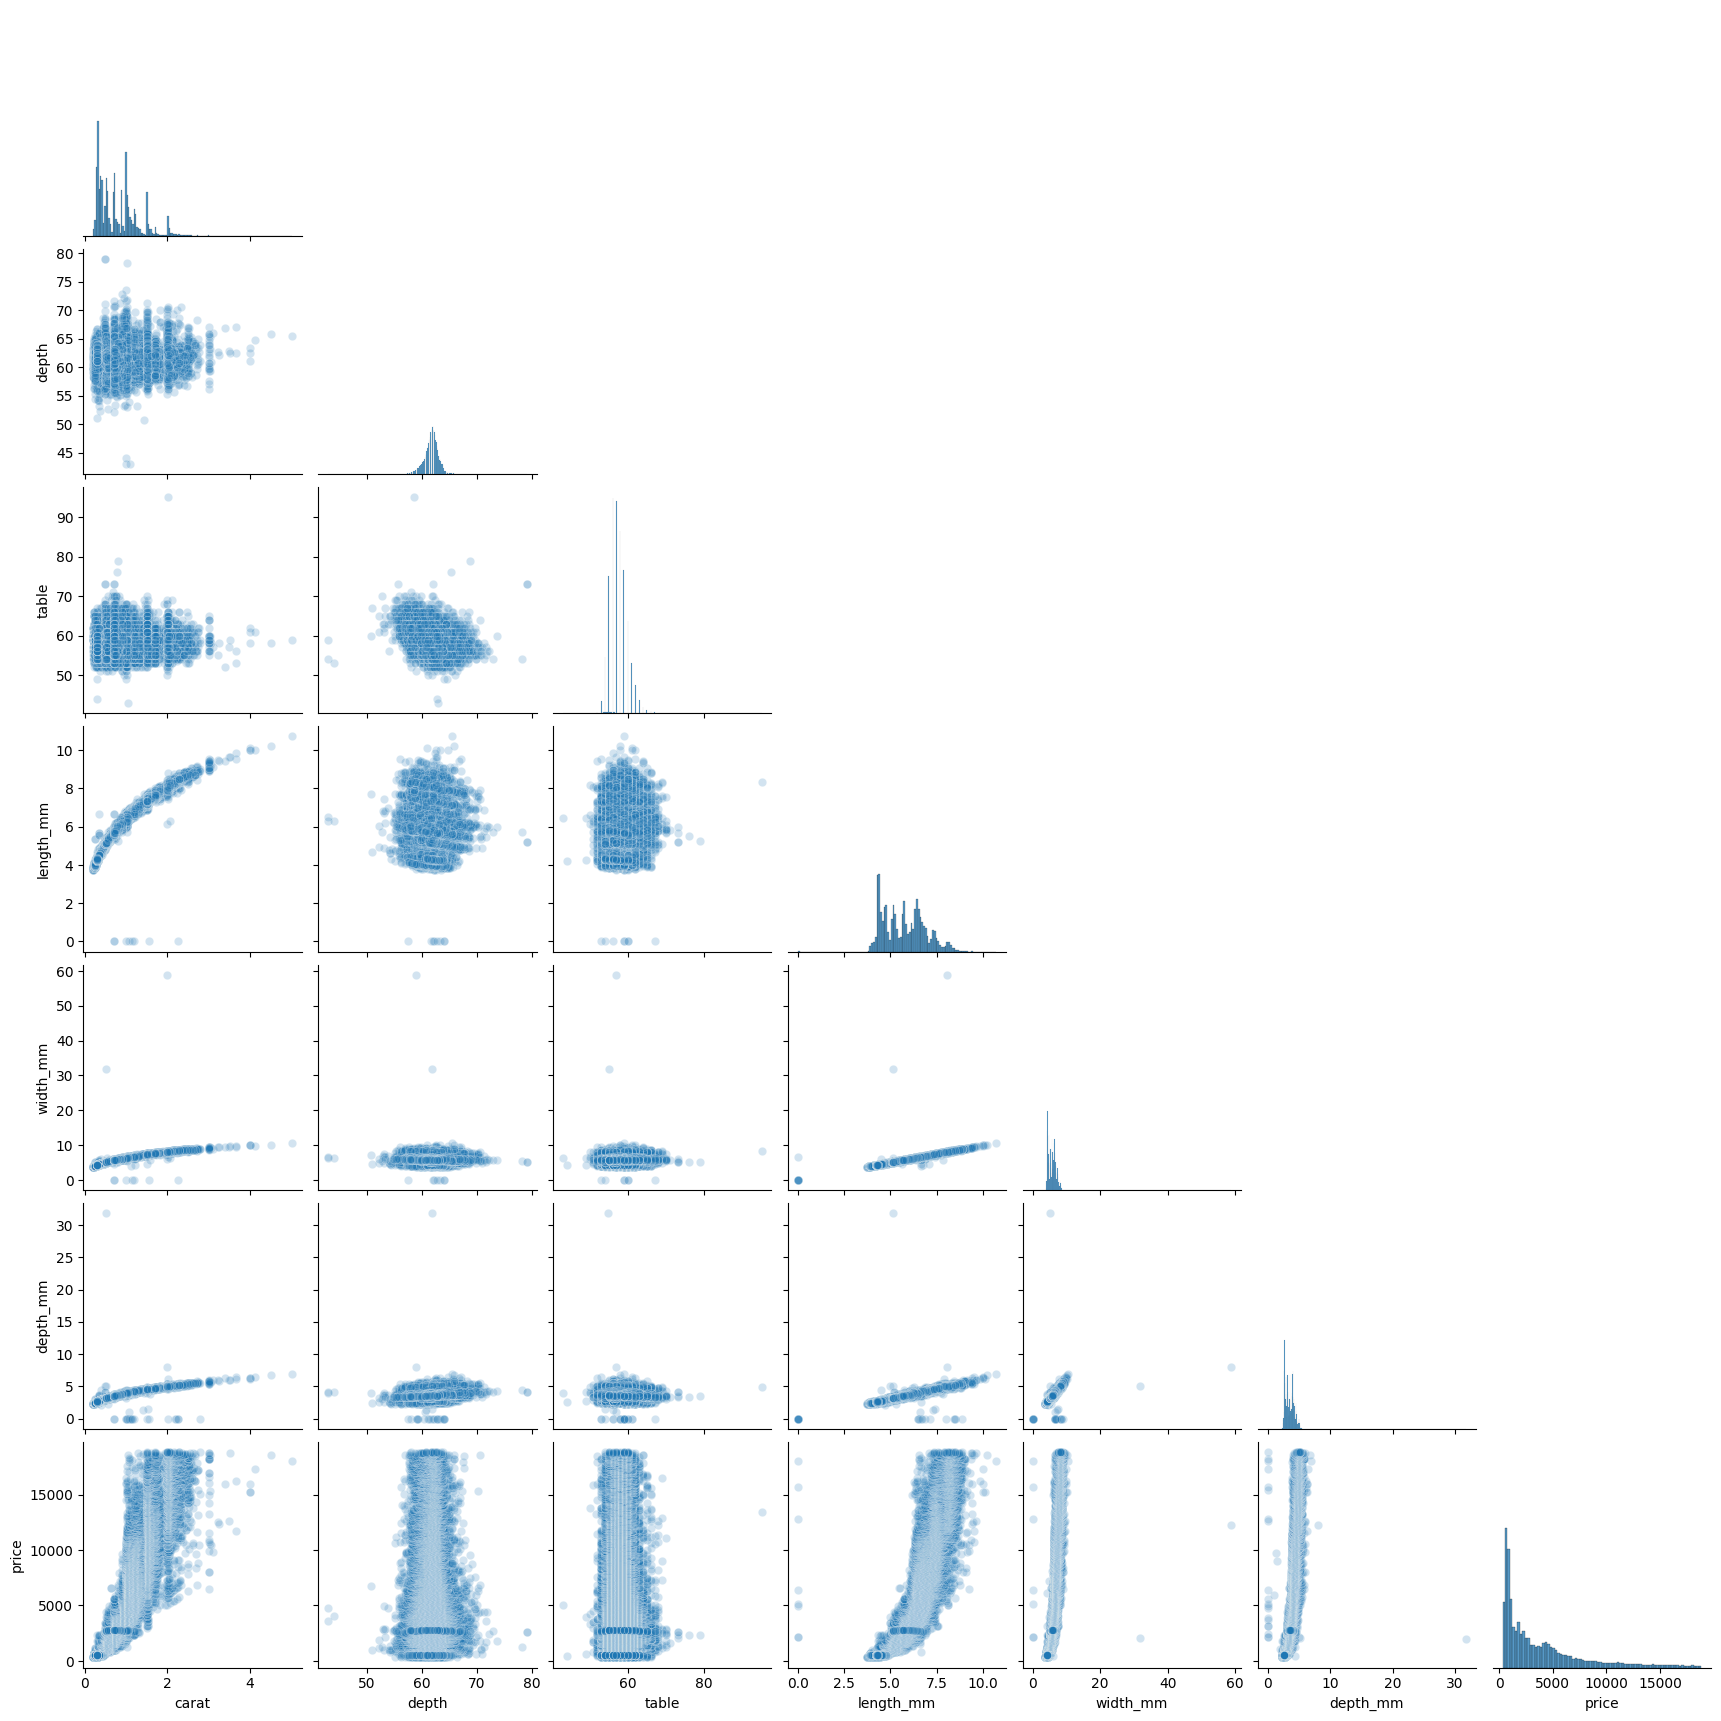

In [18]:
#for ignore irrelevent warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Creating a matrix of distributions of discrete columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(discrete_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=column, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()
# Creating a matrix of distributions of continuous columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(continuous_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data = data[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()
# Checking for outliers
sns.pairplot(data[continuous_columns], corner=True, plot_kws={'alpha':0.2})

**Data cleaning**

In [19]:
# Removing outliers in continuous columns
diamonds_data = data.copy()
diamonds_data = diamonds_data[diamonds_data['width_mm'] <= 20]
diamonds_data = diamonds_data[diamonds_data['depth_mm'] <= 10]
diamonds_data = diamonds_data[diamonds_data['depth_mm'] >= 2.33]
diamonds_data = diamonds_data[diamonds_data['depth'] >= 52]
diamonds_data = diamonds_data[diamonds_data['depth'] <= 75]
diamonds_data = diamonds_data[diamonds_data['table'] >= 50]
diamonds_data = diamonds_data[diamonds_data['table'] <= 75]

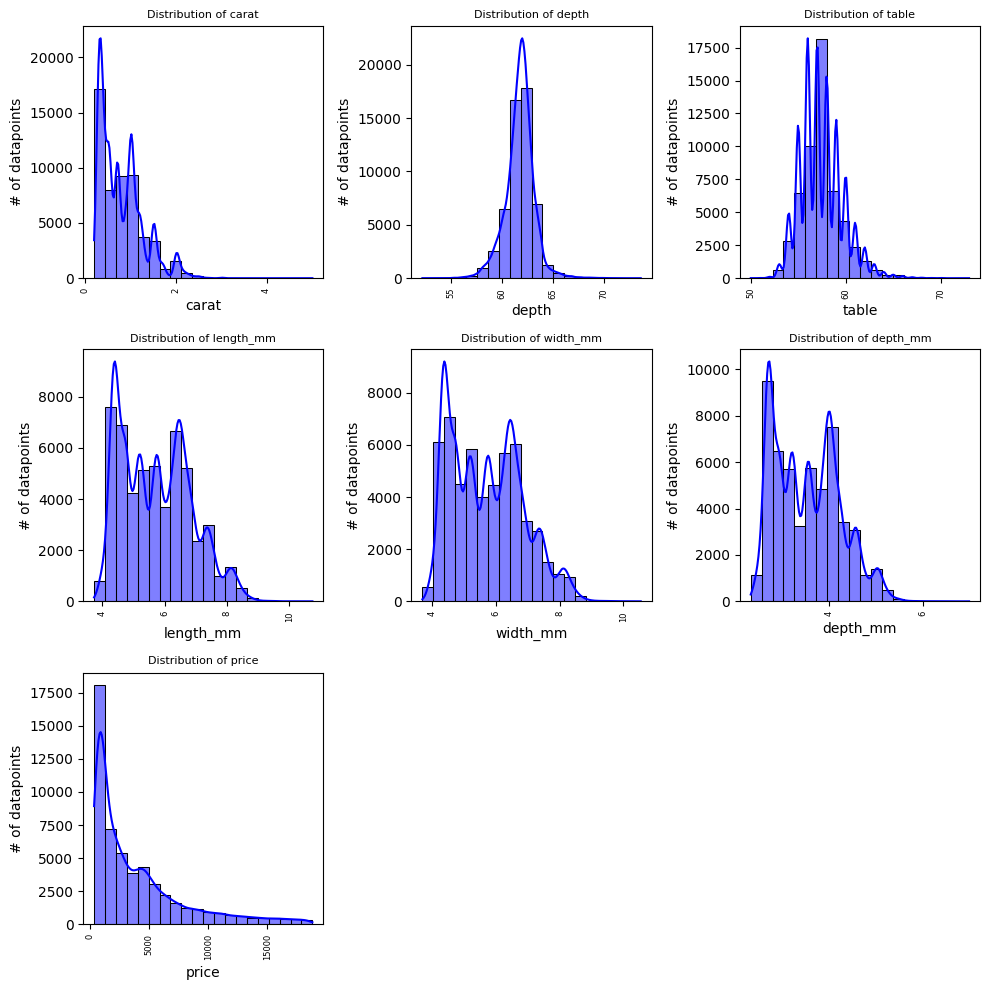

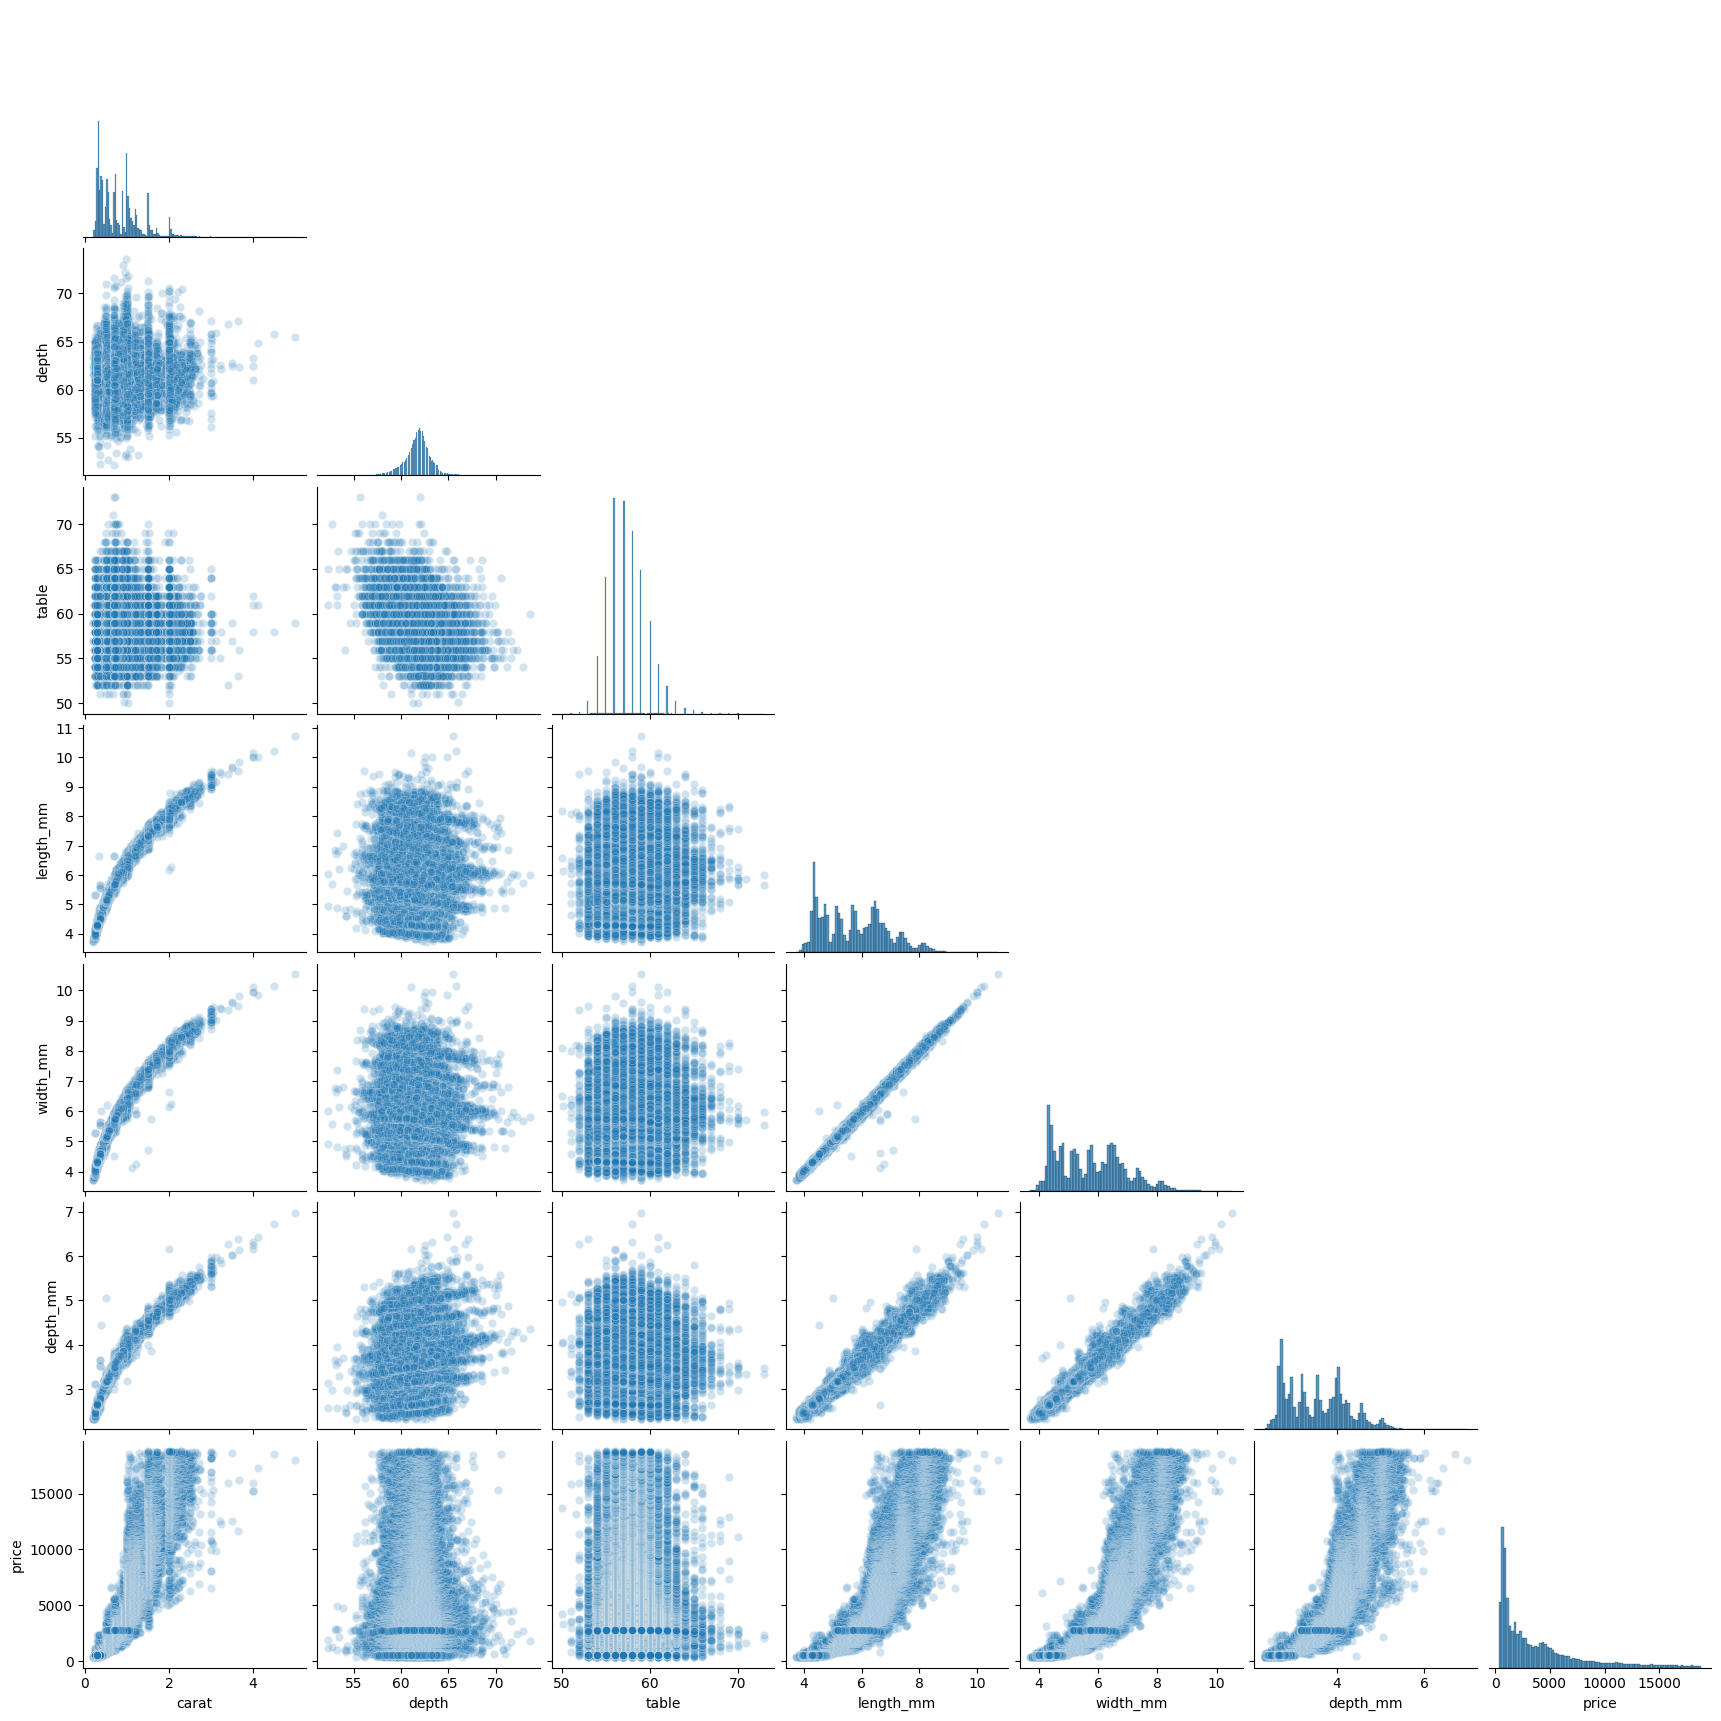

In [20]:
# Creating a matrix of distributions of continuous columns
plt.figure(figsize=(10, 10))
for i, column in enumerate(continuous_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data = diamonds_data[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}', fontsize=8)
    plt.xlabel(column)
    plt.ylabel('# of datapoints')
    plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()
# Checking for outliers
sns.pairplot(diamonds_data[continuous_columns], corner=True, plot_kws={'alpha':0.2})

**Data preprocessing**

In [21]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
diamonds_data['cut'] = encoder.fit_transform(diamonds_data['cut'])
diamonds_data['color'] = encoder.fit_transform(diamonds_data['color'])
diamonds_data['clarity'] = encoder.fit_transform(diamonds_data['clarity'])
diamonds_data

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Balanced_data = scaler.fit_transform(diamonds_data)
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
Balanced_data = rs.fit_transform(diamonds_data)
New_data = pd.DataFrame(Balanced_data, columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'length_mm', 'width_mm', 'depth_mm'])
New_data

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,-0.734375,0.0,-0.666667,-0.333333,-0.200000,-0.666667,-0.474394,-0.956284,-0.950549,-0.973451
1,-0.640625,1.0,0.666667,0.333333,0.400000,0.333333,-0.472565,-0.819672,-0.813187,-0.796460
2,-0.609375,-1.0,1.000000,-0.333333,1.000000,0.333333,-0.472337,-0.743169,-0.747253,-0.690265
3,-0.718750,2.0,1.000000,1.000000,0.666667,0.000000,-0.472108,-0.961749,-0.961538,-0.929204
4,-0.718750,2.0,0.666667,0.666667,0.333333,0.000000,-0.472108,-0.956284,-0.950549,-0.938053
...,...,...,...,...,...,...,...,...,...,...
53876,0.031250,0.0,-1.000000,-0.666667,-0.666667,0.000000,0.081390,0.027322,0.027473,-0.026549
53877,0.031250,-1.0,-1.000000,-0.666667,0.866667,-0.666667,0.081390,-0.005464,0.021978,0.070796
53878,0.000000,2.0,-1.000000,-0.666667,0.666667,1.000000,0.081390,-0.021858,-0.016484,0.026549
53879,0.250000,1.0,0.333333,-0.333333,-0.533333,0.333333,0.081390,0.245902,0.225275,0.185841


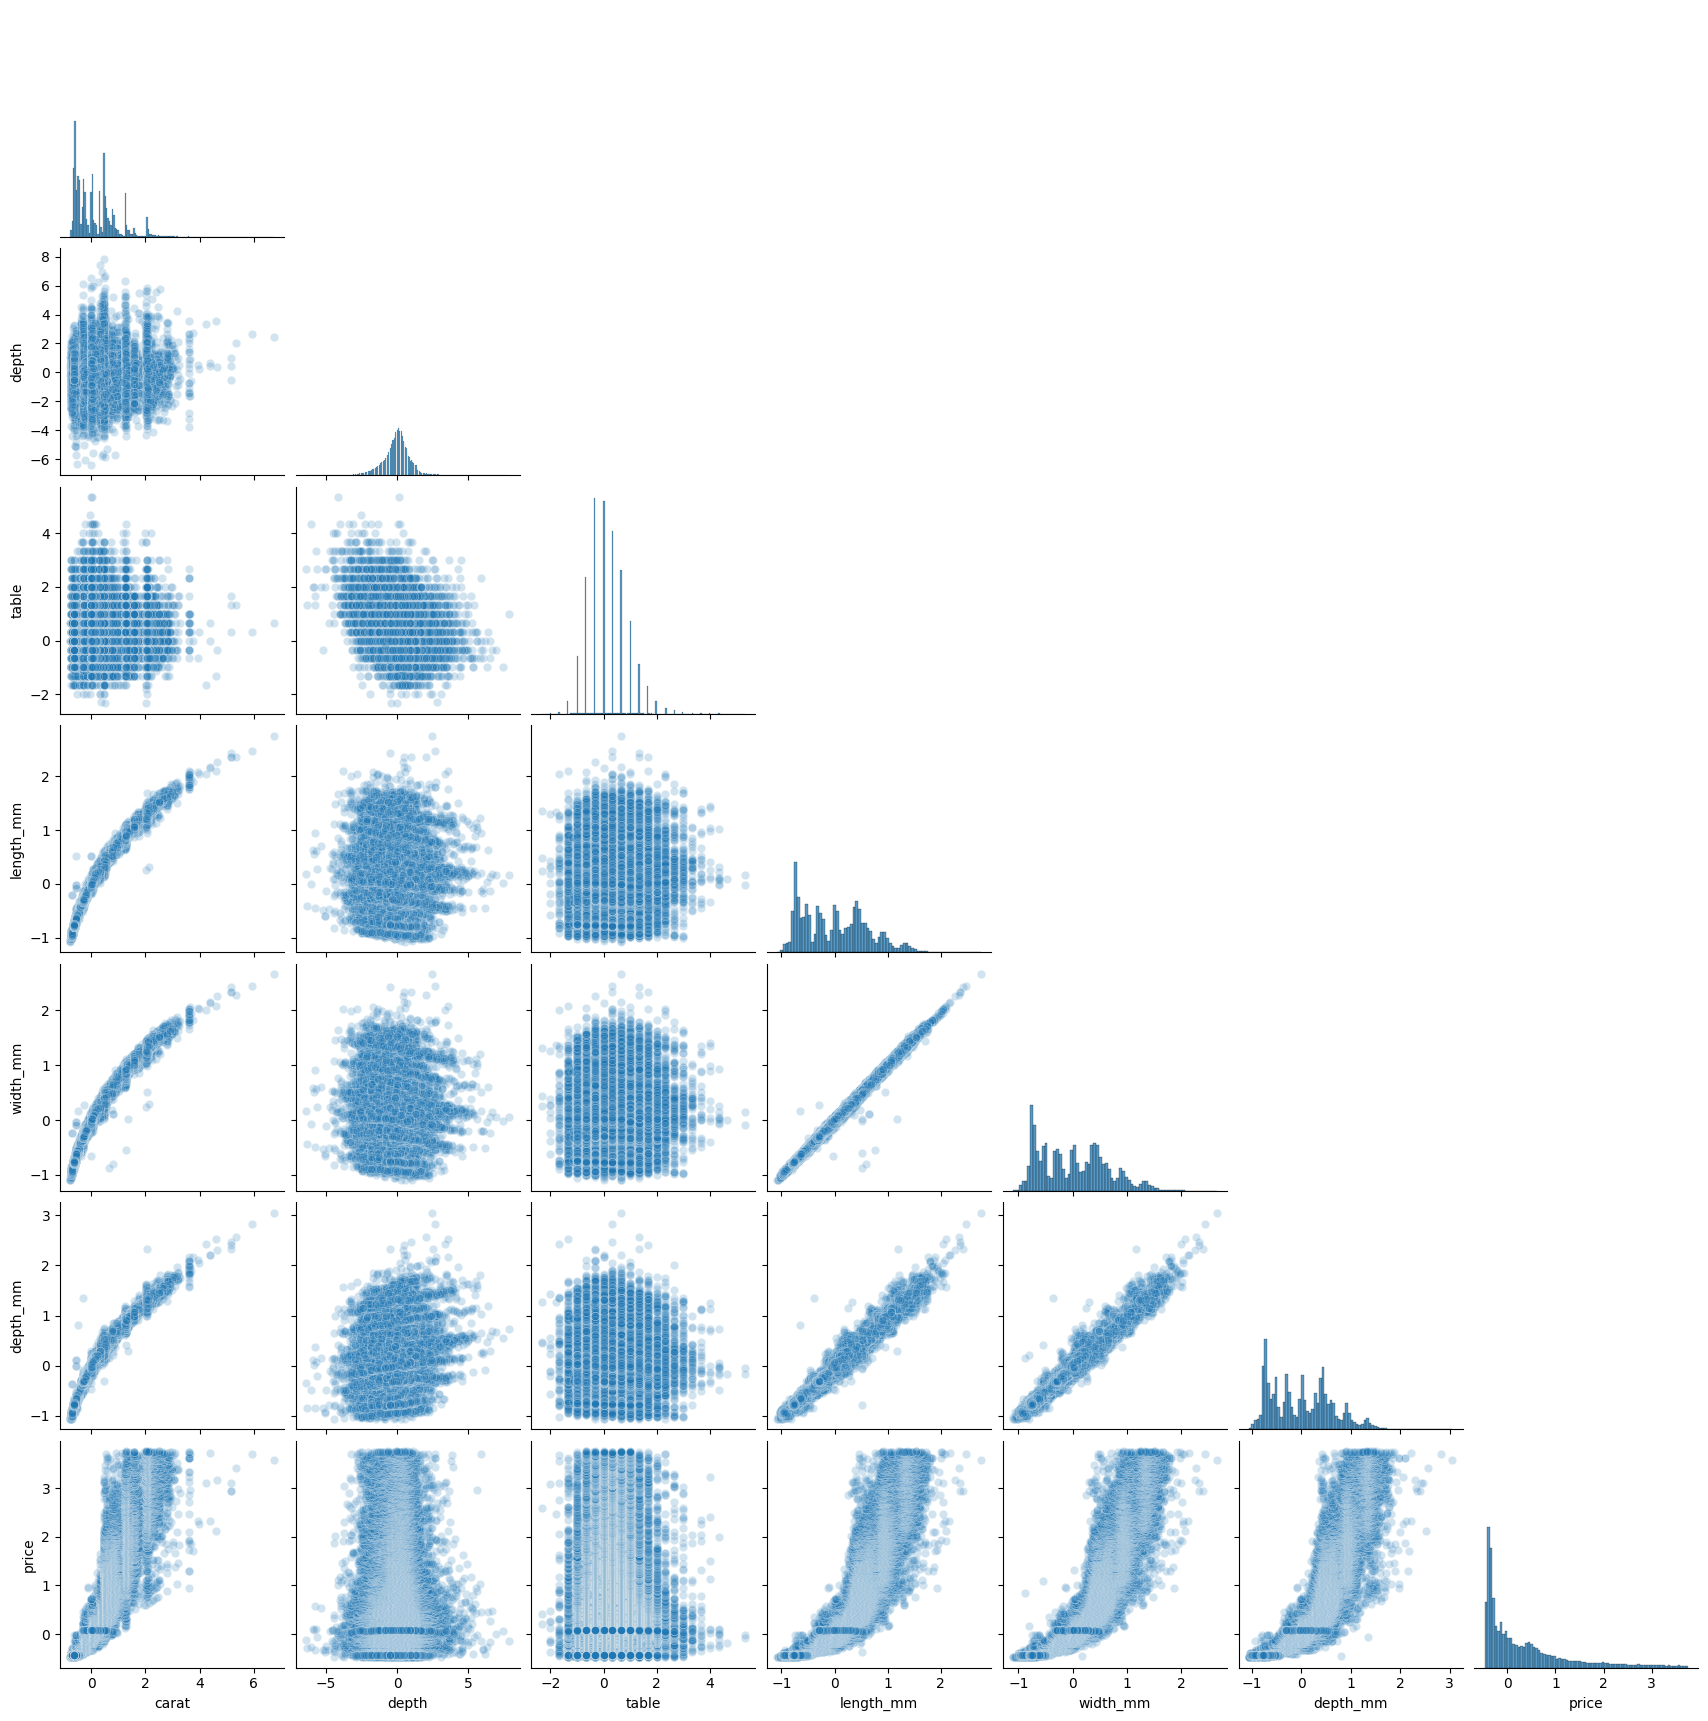

In [23]:
sns.pairplot(New_data[continuous_columns], corner=True, plot_kws={'alpha':0.2})

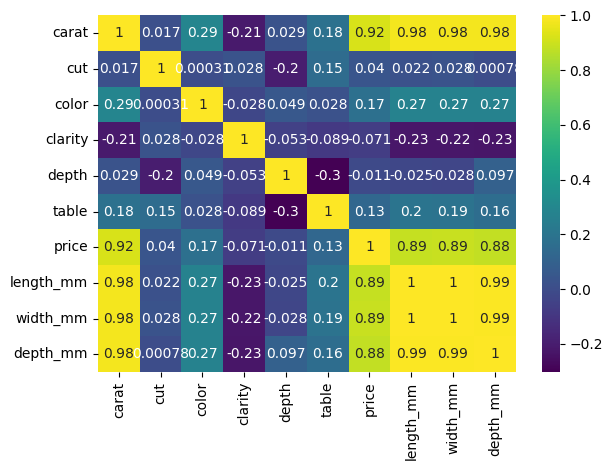

In [24]:
sns.heatmap(New_data.corr(), annot=True, cmap = 'viridis')
plt.tight_layout()
plt.show()

**Building a Linear Regression Model**

In [65]:
# Splitting data into independent (X) and dependent (y) variables
X_log = New_data.drop(columns=['price'])
y = New_data['price']

# Splitting data into train and test sets for machine learning
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

def select_model(x_log, y):
    temp_model = None
    best = 0
    models = [
        LinearRegression(),
        RandomForestRegressor(),
        XGBRegressor(),
        MLPRegressor(max_iter=1000, random_state=42)
    ]
    
    for model in models:
        score = cross_val_score(model, x_log, y, cv=5, scoring='r2')  # R-squared for regression
        mean = score.mean()
        print(f"{model.__class__.__name__}: R^2 Mean = {mean:.4f}")
        if mean > best:
            temp_model = model
            best = mean

    print(f"\nBest Model: {temp_model.__class__.__name__} with R^2 = {best:.4f}")
    return temp_model


In [69]:
Model = select_model(x_train, y_train)
Model.fit(x_train, y_train)


LinearRegression: R^2 Mean = 0.8869
RandomForestRegressor: R^2 Mean = 0.9806
XGBRegressor: R^2 Mean = 0.9809
MLPRegressor: R^2 Mean = 0.9764

Best Model: XGBRegressor with R^2 = 0.9809


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = Model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error     : {mse:.2f}")
print(f"Mean Absolute Error    : {mae:.2f}")
print(f"R-squared Score (R²)   : {r2:.4f}")


Mean Squared Error     : 0.01
Mean Absolute Error    : 0.06
R-squared Score (R²)   : 0.9818


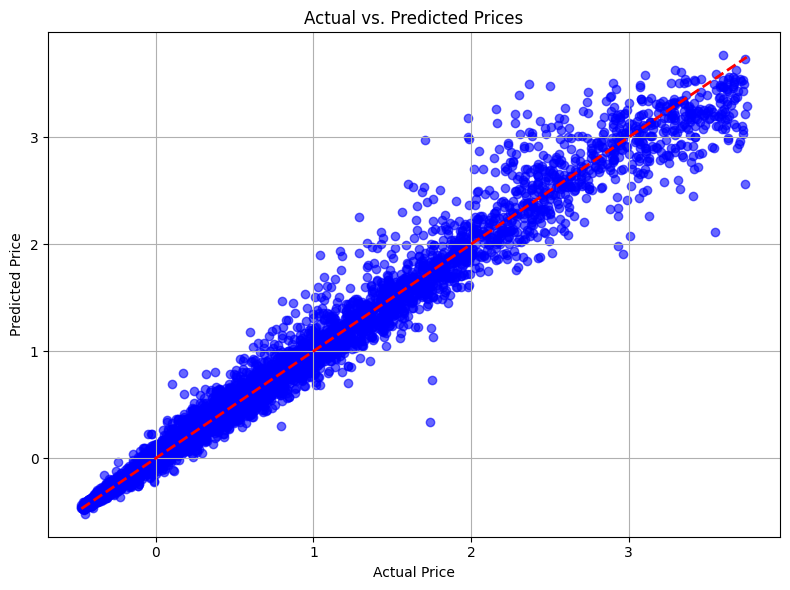

In [73]:
import matplotlib.pyplot as plt

# Predict values
y_pred = Model.predict(x_test)

# Create the plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # perfect prediction line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.tight_layout()
plt.show()